<a href="https://colab.research.google.com/github/momohirata/mooc_machine_learning/blob/master/mooc_machine_learning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第2回 Python言語によるデータ分析の基礎

### **pandasを使った統計値の分析**

In [1]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = pd.Series(iris.target)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [3]:
# target=0でfilter
df_setosa = df_iris[df_iris.target == 0]

# filterした結果の統計値を確認
df_setosa.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


### **pandasを使ったCSVの読み込み**

Google Drive上のcsvファイルにpandasでアクセスする方法
https://qiita.com/illumination-k/items/d6c086554ca38369a61f

In [4]:
url = 'https://drive.google.com/uc?id=1jX6pzJSL3J-2HSBNxMRYhgvhPtENv6e0'

df = pd.read_csv(url)

#csv dataを表示する
df[:5]

,Prefecture,Year,Total,Man,Woman
0,全国,1920,55963053,28044185,27918868
1,北海道,1920,2359183,1244322,1114861
2,青森県,1920,756454,381293,375161
3,岩手県,1920,845540,421069,424471
4,宮城県,1920,961768,485309,476459


In [5]:
# 北海道に絞り込んで、1920年の総人口のみを表示
df_hokkaido = df[df.Prefecture == '北海道']
print(df_hokkaido[df.Year == 1920])

  Prefecture  Year    Total      Man    Woman
1        北海道  1920  2359183  1244322  1114861


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Pandasを使ってグラフを書く

In [6]:
#欠損値を含む列、行を削除する
df = df.dropna(axis=1)
df = df[df['Year'] != '-']
df = df[df['Total'] != '-']
df = df[df['Man'] != '-']
df = df[df['Woman'] != '-']


#dfの型を変換
df = df.astype({'Year': int})
df = df.astype({'Man': int})
df = df.astype({'Total': int})
df = df.astype({'Woman': int})
#, 'Total': int, 'Man': int, 'Woman': int

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


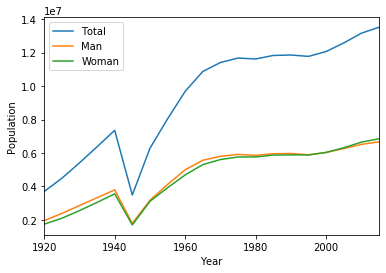

In [7]:
#pnadasが提供するplot関数を使って」グラフを描画
import matplotlib.pyplot as plt

df[df.Prefecture == '東京都'].plot(x='Year')
plt.ylabel('Population')
plt.show()

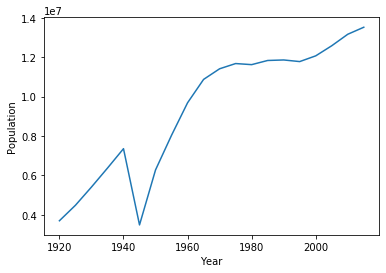

In [8]:
#Matplotlibが提供するplot関数を使って」グラフを描画
df_tokyo = df[df.Prefecture == '東京都']

plt.plot(df_tokyo.Year, df_tokyo.Total)

plt.xlabel('Year')
plt.ylabel('Population')
plt.legend

plt.show()


### pandasを使ったデータの並び替え

In [0]:
# 2015年のデータを人口の多い順に並べる
df2015 = df[df.Year == 2015]

# byでsortする列の指定、
# ascending:true → 昇順
# ascending:False → 降順
df2015.sort_values(by = 'Total',ascending=False)

### pandasを使ったグルーピング

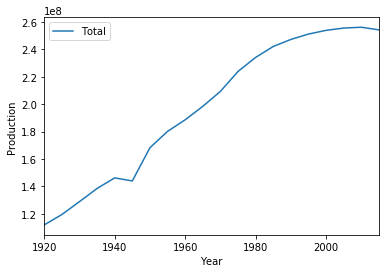

In [19]:
# 年度毎にグループにまとめる
grouped = df.groupby('Year')

# 各都道府県の総人口の和
grouped['Total'].sum().plot()
plt.ylabel('Production')
plt.legend()

plt.show()

練習問題
年度毎に女性の総人口を計算しグラフで表す

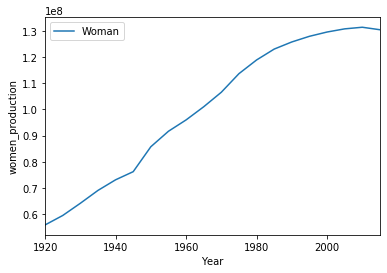

In [23]:
# 年度毎にグルーピング
grouped = df.groupby('Year')

# 各都道府県の女性の総人口の和
grouped['Woman'].sum().plot()
plt.ylabel('women_production')
plt.legend()

plt.show()

### pandasを使ってグルーピング&代表値を抽出
各都道府県の一番人口が多かった年のデータだけを取り出す

In [0]:
# 各都道府県の総人口が一番多い年ならTrue, そうでないならFalse
idx = df.groupby('Prefecture').Total.transform(max) == df.Total

idx

# 各都道府県の最大人口の年だけを表示する
df[idx]

### pandasを使って列の追加

In [29]:
# 女性人口の比率を計算した列を追加
df['WomenRatio'] = df.Woman / df.Total *100
df

,Prefecture,Year,Total,Man,Woman,WomenRatio
0,全国,1920,55963053,28044185,27918868,49.888036
1,北海道,1920,2359183,1244322,1114861,47.256232
2,青森県,1920,756454,381293,375161,49.594688
3,岩手県,1920,845540,421069,424471,50.201173
4,宮城県,1920,961768,485309,476459,49.539910
...,...,...,...,...,...,...
955,熊本県,2015,1786170,841046,945124,52.913440
956,大分県,2015,1166338,551932,614406,52.678212
957,宮崎県,2015,1104069,519242,584827,52.970150
958,鹿児島県,2015,1648177,773061,875116,53.095996
